In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
from carUtils import *

from linesUtils import *


In [2]:
Sensor()

2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db812b280>


In [3]:
s=Sensor_Array([Sensor(),Sensor(),Sensor(),Sensor(),Sensor(),Sensor(),Sensor(),Sensor()],0,0,0.1,0)


c=Car(0,0,90,s,motor_dist=0.1,sensor_array_offest=0.1)

lines=[]

lines+=make_curve(90, 0.5, start_point=[0,0],n_lines=50,left=True)
lines+=make_curve(-90, 0.5, start_point=[0,0],n_lines=10,left=False)
# lines+=make_curve(180, 1, start_point=[-1,1],n_lines=20,left=False,start_degree=90)
    
# lines+=make_curve(180, 1, start_point=[-1,3],n_lines=20,left=True,start_degree=270)
    
# lines+=make_curve(180, 1, start_point=[-1,5],n_lines=20,left=False,start_degree=90)
    
    

2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db812b550>
2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db812b820>
2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db812baf0>
2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db812bdc0>
2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db813a0d0>
2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db813a3a0>
2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db812bee0>
2
<function Sensor.__init__.<locals>.<lambda> at 0x7f6db812bc10>


<IPython.core.display.Javascript object>


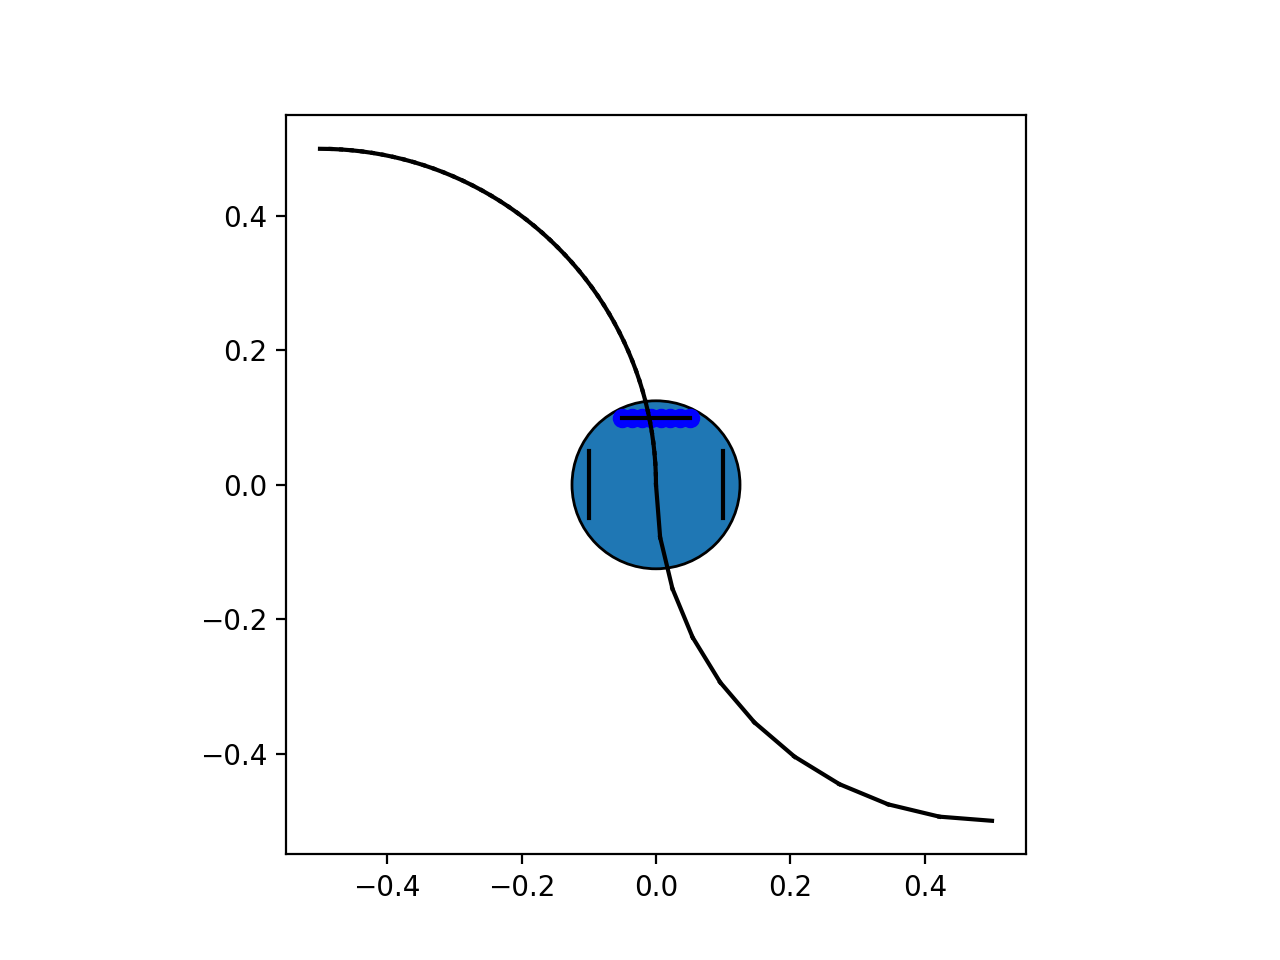

In [4]:
ax=plt.gca()
c.plot(ax)
for l in lines:
    l.draw(ax)
ax.set_aspect('equal', adjustable='box')
plt.show()

<IPython.core.display.Javascript object>


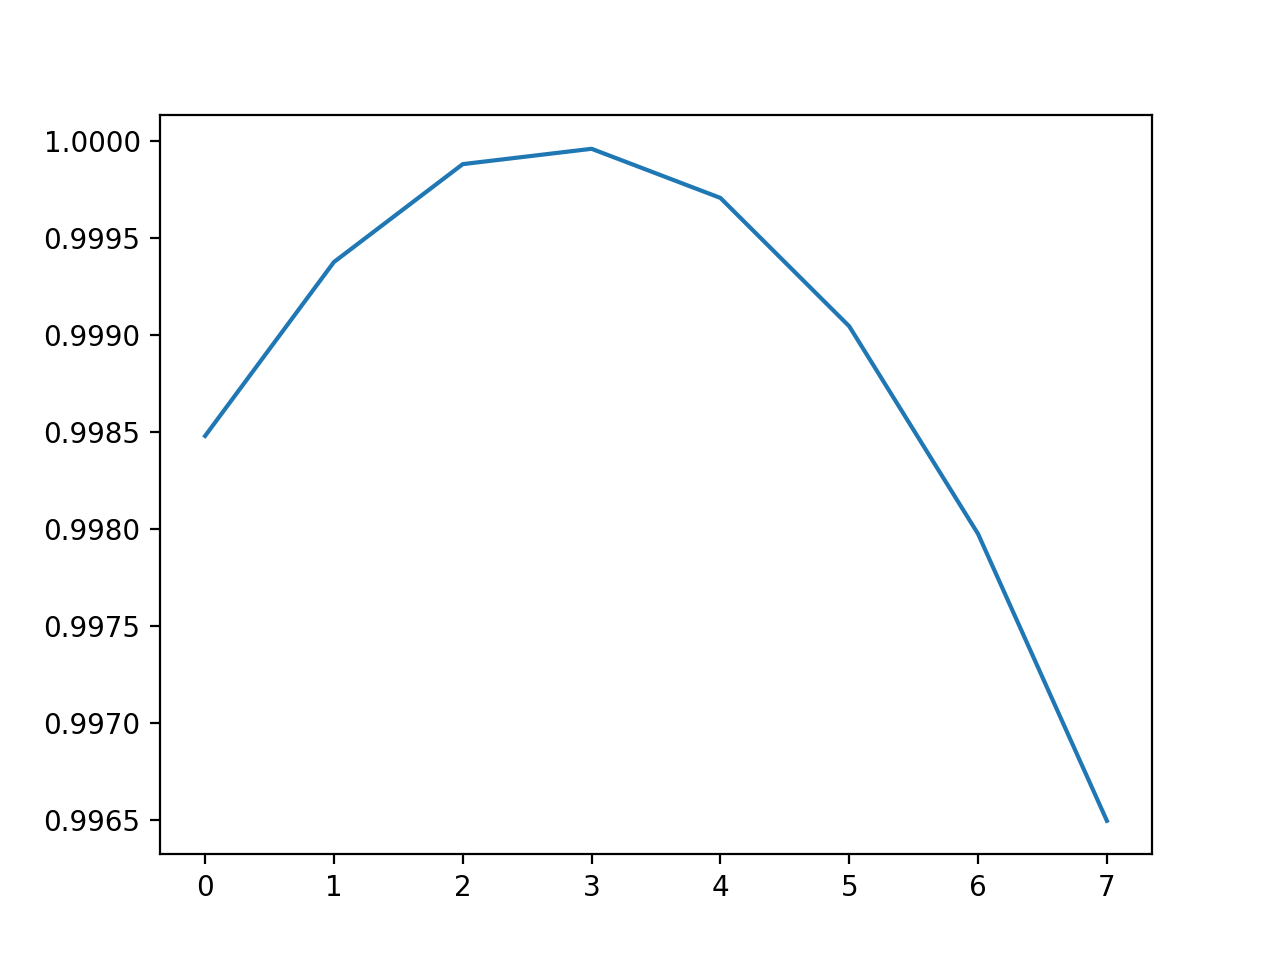

In [5]:
fig=plt.figure()
ax=plt.gca()
plt.plot(c.sensor_array.get_values(lines))


In [6]:
c.move_car(-100,100)
print("----------------")
c.move_car(-100,100)

----------------


In [7]:
def plot_car(car,motor_percentages,plot_every_niters=100,lines=[]):
    # Create subplots

    figure, [ax,ax2] = plt.subplots(2,figsize=(10,20))


    # GUI

    plt.ion()

    plt.xlabel("X-Axis",fontsize=18)
    plt.ylabel("Y-Axis",fontsize=18)
    
    sensor_values=np.empty([8,200])
    #print(np.tile(car.sensor_array.get_values(lines),(100,1)))
    sensor_values[:,:]=np.tile(car.sensor_array.get_values(lines),(200,1)).T
    
    for i in range(motor_percentages.shape[0]):
        c.move_car(motor_percentages[i,0],motor_percentages[i,1])
        if i%plot_every_niters==0:
            #print(i)
            ax.cla()
            ax2.cla()
            ax.set_aspect('equal', adjustable='box')
            c.plot(ax)
            for l in lines:
                l.draw(ax)
            ax.set_ylim(-0,1)
            ax.set_xlim(-1,0)
            
            
            sensor_values[:,:-1]=sensor_values[:,1:]
            sensor_values[:,-1]=car.sensor_array.get_values(lines)
            
            for i in range(8):
                ax2.plot(sensor_values[i])
            
            figure.canvas.draw()
            figure.canvas.flush_events()


<IPython.core.display.Javascript object>


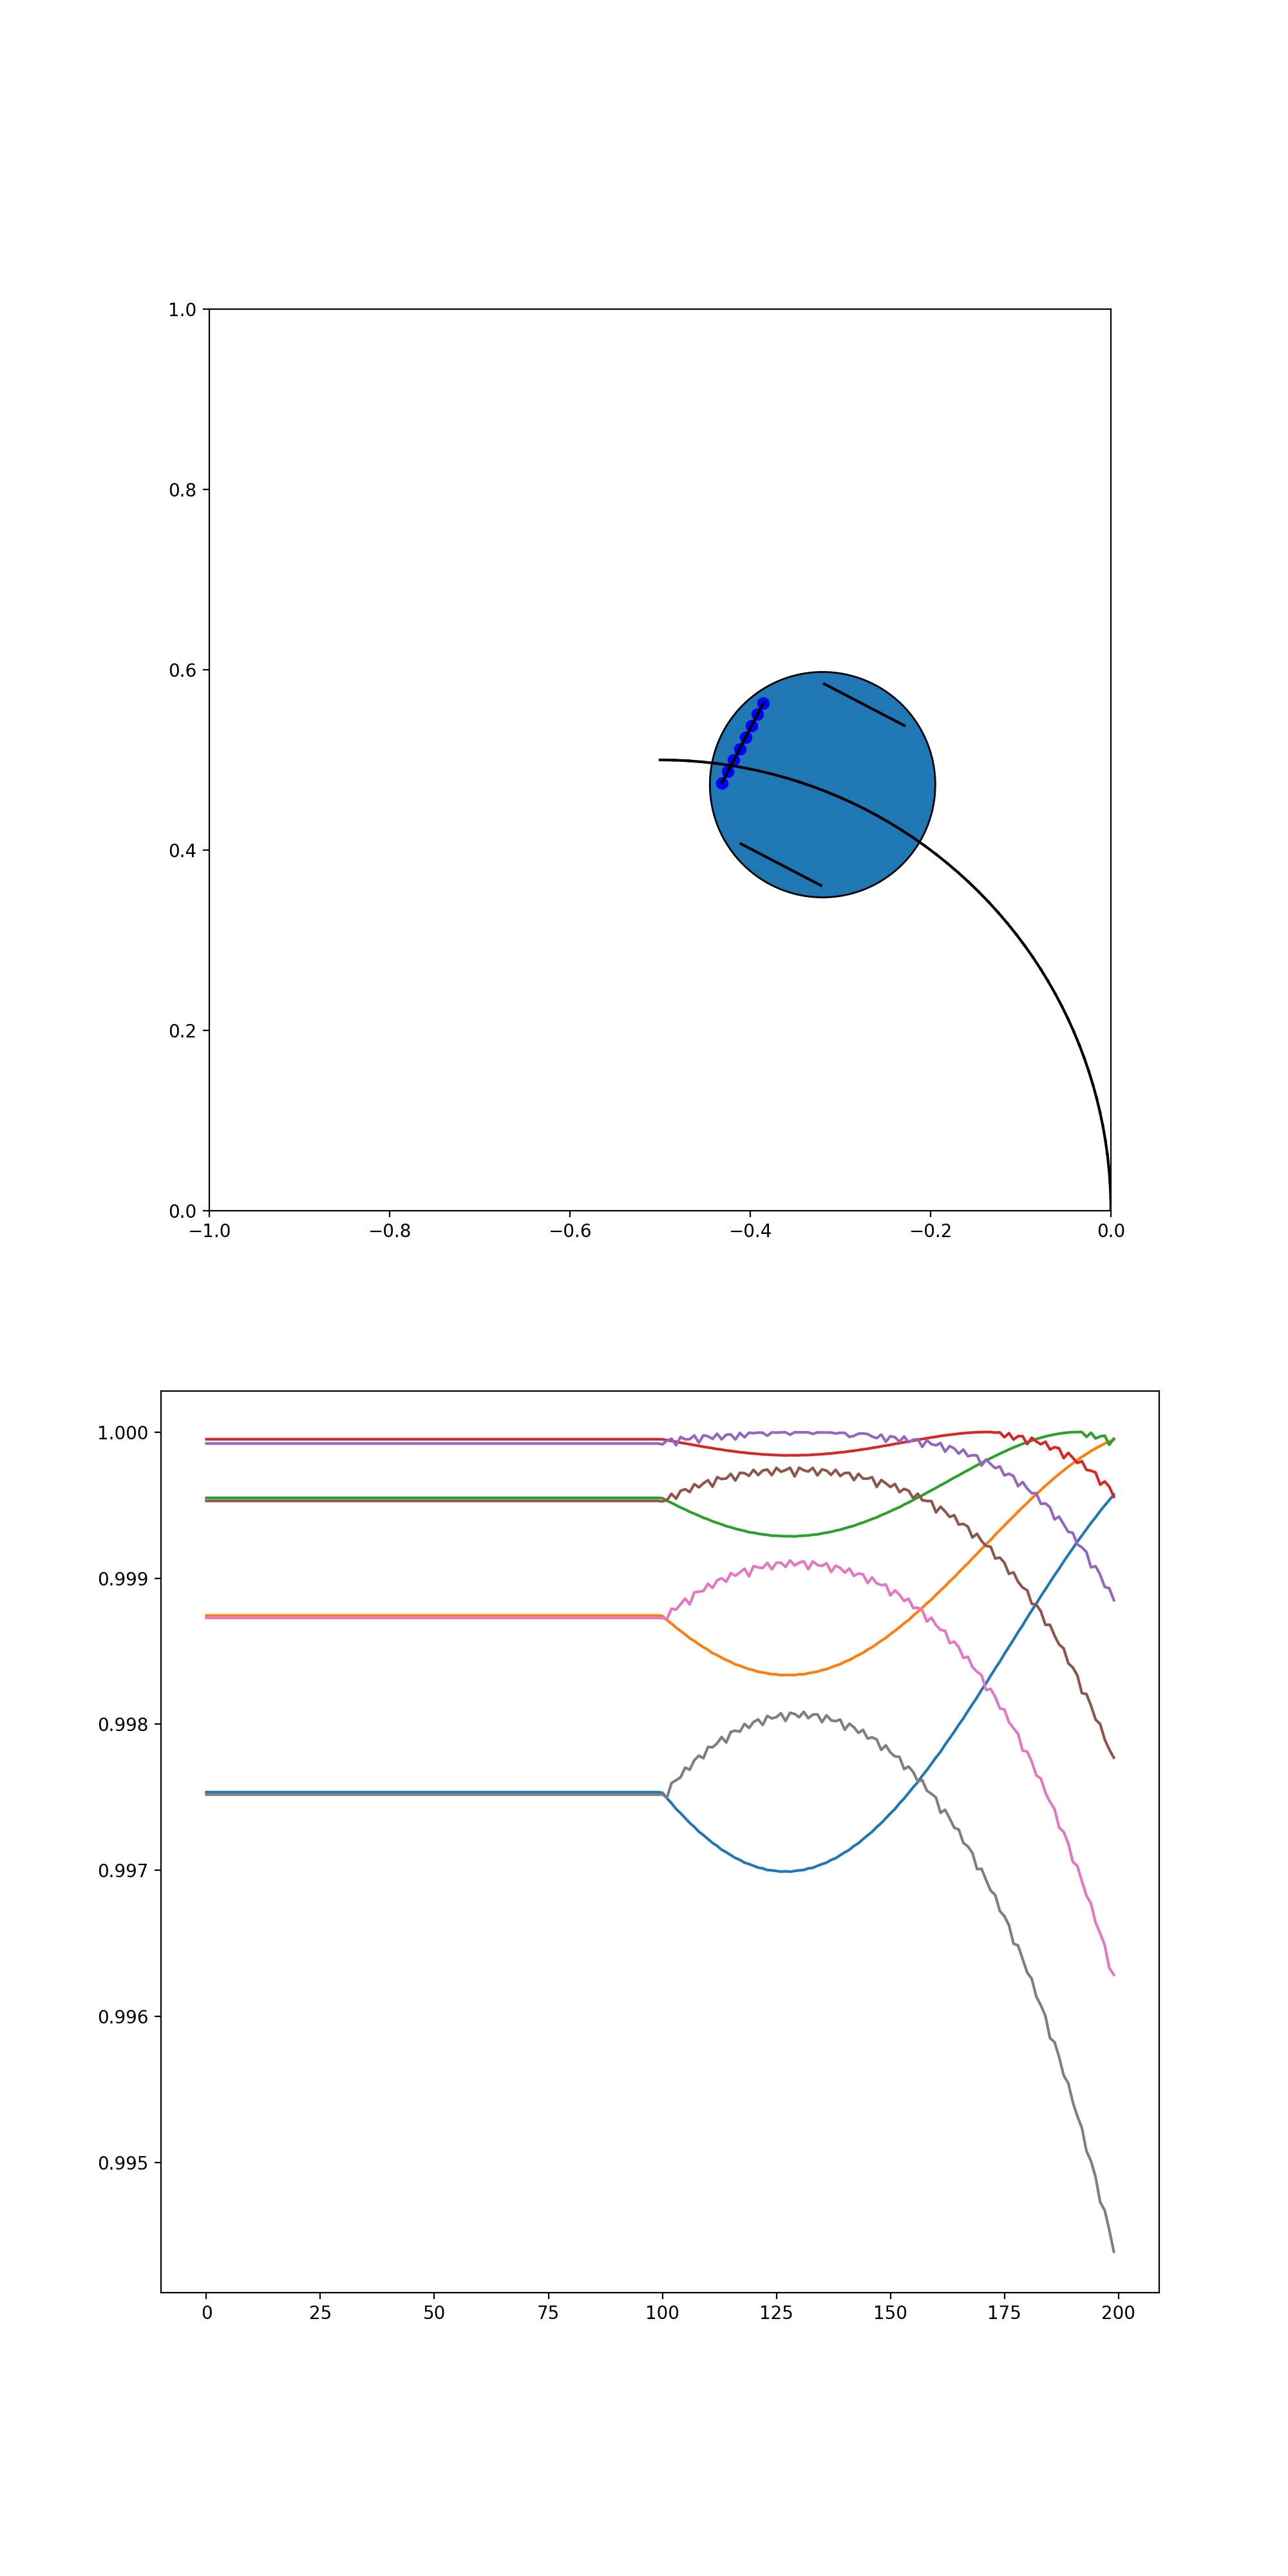

In [8]:
motor_percentages=10*np.ones([1000,2])
motor_percentages[:,1]=14
# motor_percentages[200:,0]=100
# motor_percentages[200:,1]=10
# motor_percentages[400:,0]=-100
# motor_percentages[400:,1]=-10
plot_car(c,motor_percentages,plot_every_niters=10,lines=lines)

In [9]:
np.min(np.array([[1,2],[3,4],[4,5]]).T,axis=0)

array([1, 3, 4])